In [1]:
import time

import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
import statsmodels.api as sm

import trendfilterpy as tfpy
from trendfilterpy import BinomialDistribution, GammaDistribution, LogLink
from trendfilterpy._dists import PoissonDistribution
from trendfilterpy._estimator import TrendFilterRegression
from trendfilterpy._links import LogitLink, PowerLink
from trendfilterpy._variables import FilterVar

rng = np.random.default_rng()

In [26]:
df = (
    pl.read_csv("data/french_AL_data.csv")
    .with_columns(pl.col("Area", "VehBrand", "VehGas", "Region").cast(pl.Categorical).to_physical())
    .sample(100000)
)

In [30]:
model = TrendFilterRegression(dist=tfpy.TweedieDistribution(p=1.7), link=tfpy.LogLink(), lam=0.1)
# model = TrendFilterRegression(dist=tfpy.NormalDistribution(), link=tfpy.IdentityLink(), lam=0.001)
# model = TrendFilterRegression(dist=tfpy.BinomialDistribution(), link=tfpy.LogitLink(), lam=0.001)
model.fit(
    df.drop("IDpol", "ClaimNb", "ClaimAmount", "PurePremium"),
    np.log1p(df["PurePremium"]),
    categorical_features=[1, 6, 7, 9],
)
# model.fit(
#     df.drop("IDpol", "ClaimNb", "ClaimAmount", "PurePremium"), (df["PurePremium"] > 0).cast(pl.Int64), categorical_features=[1, 6, 7, 9], n=1
# )

                                     CVXPY                                     
                                     v1.6.0                                    
(CVXPY) Mar 02 04:52:44 PM: Your problem has 1997 variables, 6 constraints, and 0 parameters.
(CVXPY) Mar 02 04:52:44 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 02 04:52:44 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 02 04:52:44 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Mar 02 04:52:44 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 02 04:52:44 PM: Compiling problem (target solver=CLARABEL)

TrendFilterRegression(dist=<trendfilterpy._dists.TweedieDistribution object at 0x315499bb0>,
                      lam=0.1,
                      link=<trendfilterpy._links.LogLink object at 0x315499cd0>)

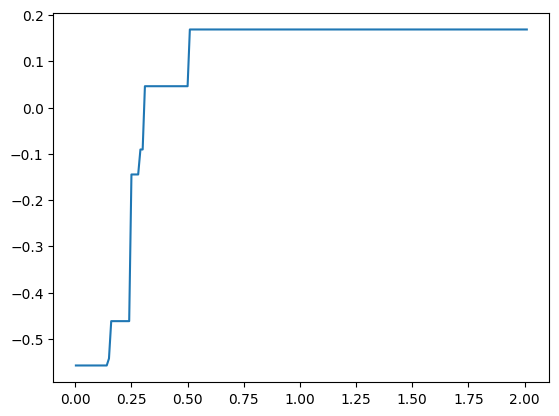

In [33]:
i = 0
plt.plot(model.vars_[i].unique_vals, model.vars_[i].beta)

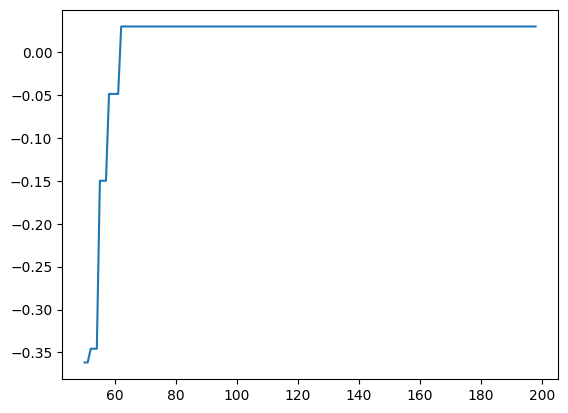

In [34]:
i = 5
plt.plot(model.vars_[i].unique_vals, model.vars_[i].beta)